In [1]:
import pandas as pd
import numpy as np

### Registry database (Source: SAD/Ancine)

A base de salas abrange os registros de agentes econômicos do segmento de exibição audiovisual na Agência Nacional do Cinema (Ancine) junto ao Sistema Ancine Digital (SAD) que serve para registro de agentes econômicos e de obras audiovisuais

A obrigação legal de registro está prevista na [Medida Provisória nº 2.228-1, de 6 setembro de 2001](http://www.planalto.gov.br/ccivil_03/mpv/2228-1.htm), art. 22, caput, e regulamentada pela [Instrução Normativa nº 91, de 1 de dezembro de 2010](https://www.gov.br/ancine/pt-br/acesso-a-informacao/legislacao/instrucoes-normativas/instrucao-normativa-n-o-91-de-1-de-dezembro-de-2010), art. 3º, caput

*The movie theater registry database covers companies in the audiovisual exhibition segment at the National Cinema Agency (Ancine) with the Ancine Digital System (SAD), which is used for the registration of economic agents and audiovisual works in Brazil*

*The legal obligation to register oneself is provided for in [Provisional Measure nº 2,228-1, of September 6, 2001] (http://www.planalto.gov.br/ccivil_03/mpv/2228-1.htm), art. 22, caput, and regulated by [Normative Instruction No. 91, of December 1, 2010] (https://www.gov.br/ancine/pt-br/acesso-a-informacao/legislacao/instrucoes-normativas/instrucao-normativa-no-91-de-1-de-december-de-2010), 3rd article, caput*

#### Import and copy

In [5]:
# import for describe (may skip)

base_salas = pd.read_excel('Dados_dos_Complexos__Salas_e_Empresas_Exibidoras.xlsx')

print(base_salas.dtypes)

SALA                            object
REGISTRO SALA                  float64
CNPJ SALA                       object
STATUS                          object
DT STATUS               datetime64[ns]
STATUS ANTERIOR                 object
DT STATUS ANTERIOR      datetime64[ns]
QT ASSENTOS                    float64
QT ASSENTOS CAD.               float64
DT INÍC. FUNC.          datetime64[ns]
COMPLEXO                        object
REG. COMPLEXO                  float64
SITUAÇÃO FUNC. COMP.            object
DT SIT. COMPLEXO        datetime64[ns]
TOTAL SALAS EM FUNC.             int64
GRUPO EXIBIDOR                  object
BAIRRO COMP.                    object
MUN. COMPLEXO                   object
UF COMPLEXO                     object
COM. NÃO COM.                   object
EVENTO FEC. COMP.               object
ITINERANTE?                     object
E-MAIL COMP.                    object
ENDEREÇO COMPLEXO               object
N° COMP.                       float64
COMPLEMENTO COMPLEXO     

In [ ]:
del base_salas

In [1]:
# defining useful columns

uteis = ['CNPJ SALA', 'NATUREZA JURÍDICA', 'QT ASSENTOS CAD.', 'SITUAÇÃO FUNC. COMP.', 'COMPLEXO', 'ENDEREÇO COMPLEXO', 
         'MUN. COMPLEXO', 'N° COMP.', 'DT STATUS ANTERIOR', 'GRUPO EXIBIDOR', 'CEP COMPLEXO', 'STATUS', 'DT SIT. COMPLEXO', 
         'AGE', 'REG. COMPLEXO', 'COM. NÃO COM.', 'BAIRRO COMP.', 'REGISTRO SALA', 'DT INÍC. FUNC.', 'SALA', 
         'REGISTRO EMPRESA', 'TOTAL SALAS EM FUNC.', 'CNPJ AGE', 'DT STATUS', 'UF COMPLEXO', 'STATUS ANTERIOR', 'QT ASSENTOS']

In [5]:
# import

base_salas = pd.read_excel('Dados_dos_Complexos__Salas_e_Empresas_Exibidoras.xlsx', usecols=uteis)

In [6]:
salas = base_salas.copy()

salas.drop(['CNPJ SALA', 'NATUREZA JURÍDICA', 'ENDEREÇO COMPLEXO', 'N° COMP.', 'DT STATUS ANTERIOR', 
            'DT SIT. COMPLEXO', 'STATUS ANTERIOR', 'DT STATUS'], axis=1, inplace=True)

#### Input manually some addresses and postal codes

In [7]:
# fixing postal code for a particular multiplex 
salas.loc[salas['REG. COMPLEXO'] == 4229, 'CEP COMPLEXO'] = '01307-001'

# • Unibanco Arteplex
# Rua Frei Caneca, 569 – 3º andar – Cerqueira César
# 01307-001 – São Paulo - SP
# Tel: (11) 3472-2359 / Fax: (11) 3266-5767

# IMPRENSA FOOD SQUARE DRIVE-IN
salas.loc[5553, 'CEP COMPLEXO'] = '60170-002'
salas.loc[5553, 'MUN. COMPLEXO'] = 'FORTALEZA'
salas.loc[5553, 'UF COMPLEXO'] = 'CE'

# all other multiplexes without county or state information will not appear in the final dataset (comparing with final res)

#### Group by multiplex

In [8]:
# grouping by multiplex

complexos = salas[salas['REG. COMPLEXO'].notna() == True].groupby(['REG. COMPLEXO']).agg({
    'COMPLEXO':'first', 'SITUAÇÃO FUNC. COMP.':'first',
    'TOTAL SALAS EM FUNC.':'first', 'GRUPO EXIBIDOR':'first', 'BAIRRO COMP.':'first',
    'MUN. COMPLEXO':'first', 'UF COMPLEXO':'first', 'COM. NÃO COM.':'first', 'CEP COMPLEXO':'first', 'AGE':'first',
    'REGISTRO EMPRESA':'first', 'CNPJ AGE':'first', 'SALA':'count'})

#### Group by movie theater chain to get total seats

In [9]:
# group by chain to get total seats at chain level
grupos = salas[salas['GRUPO EXIBIDOR'].notna()].groupby(['GRUPO EXIBIDOR']).agg({
    'QT ASSENTOS':'sum','QT ASSENTOS CAD.':'sum','SALA':'count',
    'REG. COMPLEXO': 'count'
})

# rename cols
grupos.columns = ['QT ASSENTOS', 'QT ASSENTOS CAD.', 'QT SALAS', 'QT COMPLEXOS']

In [10]:
# excluding viewing rooms with no registry (10 in total) and groupby VR id
salas_index = salas[salas['REGISTRO SALA'].notna()].groupby('REGISTRO SALA').agg({
    'SALA':'first', 'STATUS':'first','QT ASSENTOS':'first',
    'QT ASSENTOS CAD.':'first','DT INÍC. FUNC.':'first'
})

#### Some graphs

In [7]:
complexos['TOTAL SALAS EM FUNC.'].unique()

array([ 0,  7,  5,  9,  8,  1,  6,  4,  3,  2, 10, 12, 18, 11],
      dtype=int64)

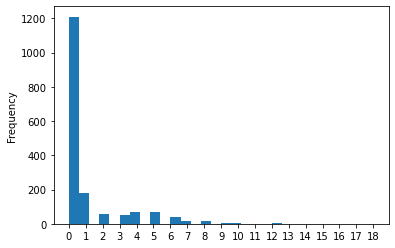

In [8]:
complexos['TOTAL SALAS EM FUNC.'].plot.hist(bins=30, xticks=list(range(19)))

# movie theater size (as per number of viewing rooms)

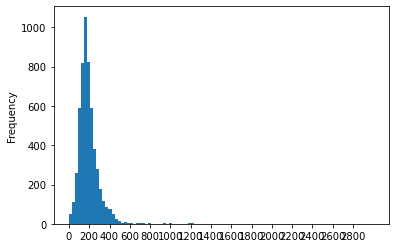

In [10]:
salas_index['QT ASSENTOS'].plot.hist(bins=100, xticks=list(range(0,3000,200)))

### SCB database (Source: SCB/Ancine) - basic data organizing and cleansing

O Sistema de Controle de Bilheteria (SCB) foi implantado pela Ancine em 2015 para receber dados de bilheteria diretamente dos exibidores. Em princípio, são exatamente os mesmos dados que os fornecidos pelos distribuidores ao SADIS.*

A diferença é que os relatórios recebidos pelo SCB são ainda mais granulares, com dados por sessão (e não por dia), e com receita discriminada por categoria de ingresso. Mais detalhes sobre o sistema estão disponíveis no [Manual](https://www.gov.br/ancine/pt-br/assuntos/atribuicoes-ancine/regulacao/cinema/cota-de-tela/manual-cota-de-tela-22-02-2018.pdf/view).

*The Box Office Control System (SCB) was implemented by Ancine in 2015 to receive box office data directly from the exhibitors. In principle, it is exactly the same data as that supplied by distributors to SADIS.*

*The difference is that the reports received by the SCB are more granular, with data per session (and not per day), and with revenue broken down by category of ticket. More details about the system are available in the [Manual](https://www.gov.br/ancine/pt-br/assuntos/atribuicoes-ancine/regulacao/cinema/cota-de-tela/manual-cota-de-tela-22-02-2018.pdf/view)*

#### First round of data treatment: merging with registry database

In [6]:
# importing raw data

from datetime import datetime

base_scb_17_19 = pd.read_csv('MV_EXIBICAO_SESSAO_TOTAL_2017_2019.csv', encoding="ISO-8859-1", delimiter=';', 
        date_parser = lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [7]:
print(base_scb_17_19.dtypes)

ANO_CINEMATOGRAFICO         int64
SEMANA_CINEMATOGRAFICA      int64
PRIMEIRO_DIA_SEMANA        object
ULTIMO_DIA_SEMANA          object
DATA_SESSAO                object
DIA_SEMANA                 object
QUALIFICADOR_DIA_SEMANA    object
HORA_SESSAO                object
DATA_HORA_SESSAO           object
TIPO_SESSAO                object
REGISTRO_SALA               int64
REGISTRO_COMPLEXO           int64
CPB_ROE                    object
TITULO                     object
NACIONALIDADE              object
PUBLICO                     int64
RENDA                      object
dtype: object


In [8]:
print(base_scb_17_19.columns)

Index(['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 'PRIMEIRO_DIA_SEMANA',
       'ULTIMO_DIA_SEMANA', 'DATA_SESSAO', 'DIA_SEMANA',
       'QUALIFICADOR_DIA_SEMANA', 'HORA_SESSAO', 'DATA_HORA_SESSAO',
       'TIPO_SESSAO', 'REGISTRO_SALA', 'REGISTRO_COMPLEXO', 'CPB_ROE',
       'TITULO', 'NACIONALIDADE', 'PUBLICO', 'RENDA'],
      dtype='object')


In [11]:
print(base_scb_17_19.describe())

       ANO_CINEMATOGRAFICO  SEMANA_CINEMATOGRAFICA  REGISTRO_SALA  \
count         1.282062e+07            1.282062e+07   1.282062e+07   
mean          2.018016e+03            2.638208e+01   5.003324e+06   
std           8.147474e-01            1.503499e+01   1.856600e+03   
min           2.017000e+03            1.000000e+00   5.000056e+06   
25%           2.017000e+03            1.300000e+01   5.001698e+06   
50%           2.018000e+03            2.700000e+01   5.003461e+06   
75%           2.019000e+03            3.900000e+01   5.005040e+06   
max           2.019000e+03            5.200000e+01   5.006528e+06   

       REGISTRO_COMPLEXO       PUBLICO  
count       1.282062e+07  1.282062e+07  
mean        1.883187e+04  3.967931e+01  
std         1.201773e+04  4.783178e+01  
min         4.360000e+02  0.000000e+00  
25%         6.397000e+03  9.000000e+00  
50%         2.040400e+04  2.200000e+01  
75%         2.826500e+04  5.100000e+01  
max         4.503200e+04  1.242000e+03  


In [13]:
# copying

scb_trab = base_scb_17_19.copy()

scb_trab.shape

(12820617, 17)

In [20]:
# casting data as floats to be able to map below

scb_trab.loc[:,'REGISTRO_COMPLEXO'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].astype(float)
scb_trab.loc[:,'REGISTRO_SALA'] = scb_trab.loc[:,'REGISTRO_SALA'].astype(float)

In [14]:
# merging with multiplex data, salas_index was defined above in the registry data

# viewing room level
scb_trab.loc[:,'QT_ASSENTOS_SALA'] = scb_trab.loc[:,'REGISTRO_SALA'].map(salas_index.loc[:,'QT ASSENTOS'])

# multiplex level
scb_trab.loc[:,'CEP_COMPLEXO'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'CEP COMPLEXO'])
scb_trab.loc[:,'MUN_COMPLEXO'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'MUN. COMPLEXO'])
scb_trab.loc[:,'UF_COMPLEXO'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'UF COMPLEXO'])
scb_trab.loc[:,'TOT_SALAS_FUNC'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'TOTAL SALAS EM FUNC.'])
scb_trab.loc[:,'COMERCIAL'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'COM. NÃO COM.'])

# company level
scb_trab.loc[:,'REG_EMPRESA'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'REGISTRO EMPRESA'])
scb_trab.loc[:,'AGE'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'AGE'])

# chain level
scb_trab.loc[:,'GRUPO_EXIBIDOR'] = scb_trab.loc[:,'REGISTRO_COMPLEXO'].map(complexos.loc[:,'GRUPO EXIBIDOR'])
scb_trab.loc[:,'QTD_COMPLEXOS_GRUPO'] = scb_trab.loc[:,'GRUPO_EXIBIDOR'].map(grupos.loc[:,'QT COMPLEXOS'])
scb_trab.loc[:,'QTD_SALAS_GRUPO'] = scb_trab.loc[:,'GRUPO_EXIBIDOR'].map(grupos.loc[:,'QT SALAS'])
scb_trab.loc[:,'QTD_ASSENTOS_GRUPO'] = scb_trab.loc[:,'GRUPO_EXIBIDOR'].map(grupos.loc[:,'QT ASSENTOS'])

In [15]:
# first treatment export

scb_trab.to_csv('SCB_2017 a 2019 tratado.csv')

#### Data organizing to group by multiplex

In [2]:
from datetime import datetime

dat_parser_scb = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')

scb_trab = pd.read_csv('SCB_2017 a 2019 tratado.csv',
                       usecols=['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA',
                                'PRIMEIRO_DIA_SEMANA', 'ULTIMO_DIA_SEMANA', 'DATA_SESSAO', 'DIA_SEMANA',
                                'QUALIFICADOR_DIA_SEMANA', 'HORA_SESSAO', 'DATA_HORA_SESSAO',
                                'TIPO_SESSAO', 'REGISTRO_SALA', 'QT_ASSENTOS_SALA', 'REGISTRO_COMPLEXO', 
                                'TITULO', 'NACIONALIDADE', 'PUBLICO', 'RENDA', 'GRUPO_EXIBIDOR', 'CPB_ROE',
                                'CEP_COMPLEXO', 'TOT_SALAS_FUNC', 'COMERCIAL', 'REG_EMPRESA', 'AGE',
                                'MUN_COMPLEXO', 'UF_COMPLEXO'], date_parser = dat_parser_scb,
                      parse_dates=['DATA_SESSAO'])

In [3]:
scb_trab.loc[:,'RENDA'] = scb_trab.RENDA.str.replace(',','.') # replacing ',' for '.' b/c floats in english use '.' 

scb_trab.loc[:,'RENDA'] = scb_trab.loc[:,'RENDA'].astype(float)

# creating occupation indicator, dividing public by total seats (nominal at registry)

scb_trab.loc[:,'OCUPAÇÃO_SALAS'] = scb_trab.loc[:,'PUBLICO'] / scb_trab.loc[:,'QT_ASSENTOS_SALA']

#### IPCA price correction

In [4]:
# importing previously treated IPCA data, see IPCA_tratamento.ipynb

IPCA = pd.read_csv('IPCA_tratado.csv', index_col=['ANO_MES'])

In [5]:
# criando lista de pares ordenados ANO_MES para criar nova coluna para mapear os dados de números_índices

scb_trab['ANO_MES']= list(zip(scb_trab['DATA_SESSAO'].apply(lambda x: x.year),scb_trab['DATA_SESSAO'].apply(lambda x: x.month)))

# transformação em str para que coincida com o formato do índice do dataframe IPCA

scb_trab.loc[:,'ANO_MES'] = scb_trab.loc[:,'ANO_MES'].astype(str)

# mapeando a coluna fator do IPCA para as linhas da base de trabalho do SCB

scb_trab.loc[:,'FATOR'] = scb_trab.loc[:,'ANO_MES'].map(IPCA.loc[:,'FATOR'])

# atualização da renda para valores de Janeiro de 2020

scb_trab.loc[:,'RENDA_ATUALIZADA_JAN20'] = scb_trab.loc[:,'RENDA']*scb_trab.loc[:,'FATOR']

#### Adding group id to session micro-data

In [6]:
# importing data

complexo_grupo = pd.read_csv('Complexo_grupo.csv', index_col=['REGISTRO DO COMPLEXO']) # multiplex-group keys and infos
cota = pd.read_csv('Cota_fiscalizacao_2017_2019.csv', index_col=['REGISTRO DO COMPLEXO']) # quotas

# some multiplexes show up only in 2019, even though their group names (we have no group id) match previously existing groups
# nevertheless, these multiplexes are not indexed in the 'complexo_grupo' file (b/c they first appeared in 2019)
# we match these movie theaters directly through name matching

nome_complexos = complexo_grupo[complexo_grupo['NOME DO GRUPO'].notna()] # getting all group names
nome_complexos.drop_duplicates(subset='NOME DO GRUPO', keep='first', inplace=True) # drop duplicates
nome_complexos.set_index('NOME DO GRUPO',inplace=True) # reindex

<ipython-input-6-68daad162e50>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nome_complexos.drop_duplicates(subset='NOME DO GRUPO', keep='first', inplace=True) # drop duplicates


In [7]:
# merging using complex id as key, for 2019 sessions
scb_trab.loc[scb_trab['ANO_CINEMATOGRAFICO'] == 2019, 'REGISTRO_GRUPO'] = scb_trab.loc[scb_trab['ANO_CINEMATOGRAFICO'] == 2019, 'REGISTRO_COMPLEXO'].map(complexo_grupo.loc[:,'REGISTRO DO GRUPO'], na_action='ignore')

# same merger, but now getting quota information for 2018 and 2017
scb_trab.loc[scb_trab['ANO_CINEMATOGRAFICO'] == 2018, 'REGISTRO_GRUPO'] = scb_trab.loc[scb_trab['ANO_CINEMATOGRAFICO'] == 2018, 'REGISTRO_COMPLEXO'].map(cota.loc[cota['ANO'] == 2018, 'REGISTRO DO GRUPO'], na_action='ignore')
scb_trab.loc[scb_trab['ANO_CINEMATOGRAFICO'] == 2017, 'REGISTRO_GRUPO'] = scb_trab.loc[scb_trab['ANO_CINEMATOGRAFICO'] == 2017, 'REGISTRO_COMPLEXO'].map(cota.loc[cota['ANO'] == 2017, 'REGISTRO DO GRUPO'], na_action='ignore')

# merging new multiplexes by group name as mentioned above
scb_trab.loc[(scb_trab['ANO_CINEMATOGRAFICO'] == 2019) & (scb_trab.REGISTRO_GRUPO.isna()),'REGISTRO_GRUPO'] = scb_trab.loc[(scb_trab['ANO_CINEMATOGRAFICO'] == 2019) & (scb_trab.REGISTRO_GRUPO.isna()),'GRUPO_EXIBIDOR'].map(nome_complexos.loc[:,'REGISTRO DO GRUPO'], na_action='ignore')

In [8]:
# finally, same as we did in the inspection data, for lines still with no match, we use company id

scb_trab.loc[scb_trab.REGISTRO_GRUPO.isna(), 'REGISTRO_GRUPO']=scb_trab.loc[scb_trab.REGISTRO_GRUPO.isna(), 'REG_EMPRESA']

In [ ]:
# exporting third version

scb_trab.to_csv('SCB_2017 a 2019 tratado 2.csv')

#### Inferring seats and viewing rooms per group and per multiplex

In [2]:
# reimport

scb_trab = pd.read_csv('SCB_2017 a 2019 tratado 2.csv')

In [9]:
# group by viewing room to see maximum and compare to registry data about seat capacity

oc_max = scb_trab.groupby(['REGISTRO_SALA']).agg({
    'PUBLICO':'max', 'QT_ASSENTOS_SALA':'first'
})

# getting inferred seats, only if registry info is unavailable, or if max observed occupation is higher than registry
for reg in oc_max.index:
    if np.isnan(oc_max.loc[reg,'QT_ASSENTOS_SALA']): # if data is unavailable in registry db, use inferred data
        oc_max.loc[reg,'ASSENTOS_INFERIDO'] = oc_max.loc[reg,'PUBLICO']
        
    elif oc_max.loc[reg,'PUBLICO'] > oc_max.loc[reg,'QT_ASSENTOS_SALA']: # if inferred is higher than max, registry is wrong
        oc_max.loc[reg,'ASSENTOS_INFERIDO'] = oc_max.loc[reg,'PUBLICO'] # get inferred also
    
    else: # last, if inferred lower than registry available data, use registry data
        oc_max.loc[reg,'ASSENTOS_INFERIDO'] = oc_max.loc[reg,'QT_ASSENTOS_SALA']

# mapping back to initial dataset
scb_trab.loc[:,'ASSENTOS_INFERIDO'] = scb_trab.loc[:,'REGISTRO_SALA'].map(oc_max['ASSENTOS_INFERIDO'])

In [10]:
# creating inferred occupation based on new cols
scb_trab['OCUPAÇÃO_SALA_INFERIDA'] = np.divide(scb_trab['PUBLICO'], scb_trab['ASSENTOS_INFERIDO'])

In [11]:
# checking whether discrepancies between inferred and registry data are great
np.subtract(scb_trab['ASSENTOS_INFERIDO'],scb_trab['QT_ASSENTOS_SALA']).value_counts(normalize=True).sort_index()[:20]

# 80% are a perfect match

0.0     0.797957
1.0     0.027314
2.0     0.032028
3.0     0.015898
4.0     0.016468
5.0     0.009366
6.0     0.008591
7.0     0.004729
8.0     0.003842
9.0     0.004096
10.0    0.003134
11.0    0.004144
12.0    0.002009
13.0    0.003548
14.0    0.004889
15.0    0.003041
16.0    0.001155
17.0    0.002590
18.0    0.001965
19.0    0.003651
20.0    0.001954
dtype: float64

In [12]:
# summing discrepancies in the 0-5 seat range
np.subtract(scb_trab['ASSENTOS_INFERIDO'],scb_trab['QT_ASSENTOS_SALA']).value_counts(normalize=True).sort_index()[:5].sum()

# discrepancies are lower than 5% account for 90% of total sessions

0.8990322706977097

In [13]:
# group by chain to get inferred number of VRs
vr_per_chain = scb_trab.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_GRUPO']).agg({'REGISTRO_SALA':'nunique'})


# map back to database year by year
for y in [2017, 2018, 2019]:
    scb_trab.loc[scb_trab.ANO_CINEMATOGRAFICO == y,'SALAS_GRUPO_INFERIDO'] = scb_trab.loc[:,'REGISTRO_GRUPO'].map(vr_per_chain.loc[y, 'REGISTRO_SALA'])

#### Getting seats per multiplex and group (and inferring no. of viewing rooms per multiplex)

In [14]:
# getting no. of seats per VR with mulitplex and year id
comp_seats = scb_trab.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_COMPLEXO','REGISTRO_SALA'], as_index=False).agg({
    'ASSENTOS_INFERIDO':'first'})

In [15]:
comp_seats.head()

,ANO_CINEMATOGRAFICO,REGISTRO_COMPLEXO,REGISTRO_SALA,ASSENTOS_INFERIDO
0,2017,436,5000827,180.0
1,2017,436,5000828,150.0
2,2017,436,5000829,181.0
3,2017,438,5002226,111.0
4,2017,438,5002227,212.0


In [16]:
# now agg at year/multiplex level to get total no. of seats a multiplex has
comp_seats_agg = comp_seats.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_COMPLEXO']).agg({
    'REGISTRO_SALA':'nunique','ASSENTOS_INFERIDO':'sum'
})

In [17]:
# map back to database year by year
for y in [2017, 2018, 2019]:
    scb_trab.loc[scb_trab.ANO_CINEMATOGRAFICO == y,'SALAS_COMPLEXO_INFERIDO'] = scb_trab.loc[
        :,'REGISTRO_COMPLEXO'].map(comp_seats_agg.loc[y, 'REGISTRO_SALA'])
    scb_trab.loc[scb_trab.ANO_CINEMATOGRAFICO == y,'ASSENTOS_COMPLEXO_INFERIDO'] = scb_trab.loc[
        :,'REGISTRO_COMPLEXO'].map(comp_seats_agg.loc[y, 'ASSENTOS_INFERIDO'])

In [18]:
# doing the same for group
group_seats = scb_trab.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_GRUPO','REGISTRO_SALA'], as_index=False).agg({
    'ASSENTOS_INFERIDO':'first'})
group_seats_agg = group_seats.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_GRUPO']).agg({
    'ASSENTOS_INFERIDO':'sum'
})

In [19]:
# map back to database year by year
for y in [2017, 2018, 2019]:
    scb_trab.loc[scb_trab.ANO_CINEMATOGRAFICO == y,'ASSENTOS_GRUPO_INFERIDO'] = scb_trab.loc[
        :,'REGISTRO_GRUPO'].map(group_seats_agg.loc[y, 'ASSENTOS_INFERIDO'])

#### Getting session starting hours

In [20]:
# adjusting time

def adj_hora(hora):
    h = int(hora[:2]) # getting two first digits as hours
    m = int(hora[3:5]) # 3-5 as minutes
    if h != 23:
        if m > 30: # if more than half past hour, assign to next
            return h+1
        else: # do not change
            return h  
    else: # for 11 pm o'clock, must reset to 0
        if m > 30:
            return 0
        else:
            return h

In [21]:
# getting session start hours

scb_trab['HORA_ajustada'] = scb_trab['HORA_SESSAO'].apply(adj_hora)

#### Getting number of opening days per multiplex

In [11]:
# getting unique date info to aggregate and obtain total opening days

from datetime import datetime

scb_trab.loc[:,'DATA_SESSAO'] = scb_trab.loc[:,'DATA_SESSAO'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
scb_trab.loc[:,'DATA'] = scb_trab.loc[:,'DATA_SESSAO'].dt.date

In [12]:
scb_trab.columns

Index(['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 'PRIMEIRO_DIA_SEMANA',
       'ULTIMO_DIA_SEMANA', 'DATA_SESSAO', 'DIA_SEMANA',
       'QUALIFICADOR_DIA_SEMANA', 'HORA_SESSAO', 'DATA_HORA_SESSAO',
       'TIPO_SESSAO', 'REGISTRO_SALA', 'REGISTRO_COMPLEXO', 'CPB_ROE',
       'TITULO', 'NACIONALIDADE', 'PUBLICO', 'RENDA', 'QT_ASSENTOS_SALA',
       'CEP_COMPLEXO', 'MUN_COMPLEXO', 'UF_COMPLEXO', 'TOT_SALAS_FUNC',
       'COMERCIAL', 'REG_EMPRESA', 'AGE', 'GRUPO_EXIBIDOR', 'OCUPAÇÃO_SALAS',
       'ANO_MES', 'FATOR', 'RENDA_ATUALIZADA_JAN20', 'REGISTRO_GRUPO',
       'ASSENTOS_INFERIDO', 'OCUPAÇÃO_SALA_INFERIDA', 'SALAS_GRUPO_INFERIDO',
       'SALAS_COMPLEXO_INFERIDO', 'ASSENTOS_COMPLEXO_INFERIDO',
       'ASSENTOS_GRUPO_INFERIDO', 'HORA_ajustada', 'DIAS_FUNCIONAMENTO',
       'DATA'],
      dtype='object')

In [7]:
# groupby no. of opening days per multiplex per year
op_days = scb_trab.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_COMPLEXO']).agg({
    'DIAS_FUNCIONAMENTO':'nunique', 'REGISTRO_GRUPO':'first'})

In [18]:
# map back to original dataset
for y in [2017, 2018, 2019]:
    scb_trab.loc[scb_trab.ANO_CINEMATOGRAFICO == y, 'DIAS_FUNCIONAMENTO'] = scb_trab.loc[
        scb_trab.ANO_CINEMATOGRAFICO == y, 'REGISTRO_COMPLEXO'].map(op_days.loc[y,'DIAS_FUNCIONAMENTO'])

#### Getting number of opening days per chain

In [20]:
# groupby no. of opening days per multiplex per year, but with chain info
chain_op_days = scb_trab.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_COMPLEXO'], as_index=False).agg({
    'DIAS_FUNCIONAMENTO':'nunique', 'REGISTRO_GRUPO':'first'})

In [21]:
# now sum all op days of multiplexes to get chain-level aggregates
chain_sum = chain_op_days.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_GRUPO']).agg({
    'DIAS_FUNCIONAMENTO':'sum'
})

In [23]:
# map back to original dataset
for y in [2017, 2018, 2019]:
    scb_trab.loc[scb_trab.ANO_CINEMATOGRAFICO == y, 'DIAS_FUNCIONAMENTO_GRUPO'] = scb_trab.loc[
        scb_trab.ANO_CINEMATOGRAFICO == y, 'REGISTRO_GRUPO'].map(chain_sum.loc[y,'DIAS_FUNCIONAMENTO'])

#### Merging with inspection data

##### Complex-level

In [14]:
# import quotas to merge with index by group registry
cota = pd.read_csv('Cota_fiscalizacao_2017_2019.csv',
                        index_col=('ANO_CINEMATOGRAFICO','REGISTRO DO COMPLEXO'))

In [15]:
cota.columns

Index(['REGISTRO DO GRUPO', 'NOME DO GRUPO', 'REGISTRO DA EMPRESA',
       'NOME DA EMPRESA', 'NOME DO COMPLEXO', 'TOTAL SALAS DO COMPLEXO',
       'Nº DE DIAS OBRIGAÇÃO PROPORCIONAL', 'OBRIGAÇÃO_TOTAL_INCREMENTO',
       'OBRIGAÇÃO_PROP_INCREMENTO', 'OBRIGAÇÃO_TOTAL', 'OBG_FINAL',
       'Nº DE DIAS VALIDADOS', 'Nº DE TÍTULOS DIFERENTES OBRIGAÇÃO',
       'Nº DE TÍTULOS DIFERENTES DECLARADOS', 'CUMPRIU COTA', 'TRANSF_ORIGEM',
       'TRANSF_RECEBIDOS', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'CUMPRIMENTO_PROPORCIONAL', 'DIAS_FUNC_INFERIDOS',
       'CUMPRIMENTO_PROP_TRUNCADO', 'CUMPRIMENTO_LINEAR',
       'CUMPRIMENTO_NORMALIZADO', 'CUMPRIMENTO_TRIWEIGHT'],
      dtype='object')

In [16]:
# mapping to multiplex

param = 'REGISTRO_COMPLEXO'

def inspection_apply(row,ds,col,typ):
    return ds.loc[(row['ANO_CINEMATOGRAFICO'],row[typ]),c]

cols = ['OBRIGAÇÃO_TOTAL_POR_SALA','OBRIGAÇÃO_FINAL_POR_SALA',
        'CUMPRIMENTO_PROPORCIONAL','CUMPRIMENTO_PROP_TRUNCADO','CUMPRIMENTO_TRIWEIGHT']

local = scb_trab.query("COMERCIAL == 'COMERCIAL' & ANO_CINEMATOGRAFICO != 2019")[['ANO_CINEMATOGRAFICO',param]]

for c in cols:
    print(cols.index(c))
    scb_trab.loc[(scb_trab.COMERCIAL == 'COMERCIAL')&(scb_trab.ANO_CINEMATOGRAFICO != 2019),c
                ] = local.apply(inspection_apply, args=(cota,c,param) ,axis=1)
    scb_trab.loc[(scb_trab.COMERCIAL != 'COMERCIAL')|(scb_trab.ANO_CINEMATOGRAFICO == 2019),c
                ] = 0

0


KeyError: (2018, 27245)

##### Chain-level

In [17]:
# import quotas to merge with index by group registry
cota_grupo = pd.read_csv('Cota_grupo_fiscalizacao_2017_2019.csv',
                        index_col=('ANO_CINEMATOGRAFICO','REGISTRO DO GRUPO'))

In [19]:
param = 'REGISTRO_GRUPO'

def inspection_apply(row,ds,col,typ): # def function to get info from inspection data
    return ds.loc[(row['ANO_CINEMATOGRAFICO'],row[typ]),c]

cols = ['OBRIGAÇÃO_TOTAL_POR_SALA','OBRIGAÇÃO_FINAL_POR_SALA',
        'CUMPRIMENTO_PROPORCIONAL','CUMPRIMENTO_PROP_TRUNCADO','CUMPRIMENTO_TRIWEIGHT'] # choose cols to merge

# for memory reasons, only get cols that will be used
local = scb_trab.query("COMERCIAL == 'COMERCIAL' & ANO_CINEMATOGRAFICO != 2019")[['ANO_CINEMATOGRAFICO',param]]

for c in cols:
    print(cols.index(c))
    scb_trab.loc[(scb_trab.COMERCIAL == 'COMERCIAL')&(scb_trab.ANO_CINEMATOGRAFICO != 2019),f'{c}_GRUPO'
                ] = local.apply(inspection_apply, args=(cota_grupo,c,param) ,axis=1)
    scb_trab.loc[(scb_trab.COMERCIAL != 'COMERCIAL')|(scb_trab.ANO_CINEMATOGRAFICO == 2019),f'{c}_GRUPO'
                ] = 0

0
1
2
3


In [22]:
scb_trab.loc[(scb_trab.COMERCIAL != 'COMERCIAL')|(scb_trab.ANO_CINEMATOGRAFICO == 2019),'OBRIGAÇÃO_TOTAL_POR_SALA_GRUPO'] = 0

In [23]:
scb_trab.isna().sum()

ANO_CINEMATOGRAFICO                   0
SEMANA_CINEMATOGRAFICA                0
PRIMEIRO_DIA_SEMANA                   0
ULTIMO_DIA_SEMANA                     0
DATA_SESSAO                           0
DIA_SEMANA                            0
QUALIFICADOR_DIA_SEMANA               0
HORA_SESSAO                           0
DATA_HORA_SESSAO                      0
TIPO_SESSAO                           0
REGISTRO_SALA                         0
REGISTRO_COMPLEXO                     0
CPB_ROE                               0
TITULO                                1
NACIONALIDADE                         0
PUBLICO                               0
RENDA                                 0
QT_ASSENTOS_SALA                   2363
CEP_COMPLEXO                          0
MUN_COMPLEXO                          0
UF_COMPLEXO                           0
TOT_SALAS_FUNC                        0
COMERCIAL                             0
REG_EMPRESA                           0
AGE                                   0


#### Quick data cleansing and new export

In [24]:
# scb_trab.drop(['Unnamed: 0'], axis=1, inplace=True) # dropping former index

scb_trab.to_csv('SCB_2017 a 2019 tratado 2.csv', index=False) # export

In [26]:
scb_trab.columns

Index(['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 'PRIMEIRO_DIA_SEMANA',
       'ULTIMO_DIA_SEMANA', 'DATA_SESSAO', 'DIA_SEMANA',
       'QUALIFICADOR_DIA_SEMANA', 'HORA_SESSAO', 'DATA_HORA_SESSAO',
       'TIPO_SESSAO', 'REGISTRO_SALA', 'REGISTRO_COMPLEXO', 'CPB_ROE',
       'TITULO', 'NACIONALIDADE', 'PUBLICO', 'RENDA', 'QT_ASSENTOS_SALA',
       'CEP_COMPLEXO', 'MUN_COMPLEXO', 'UF_COMPLEXO', 'TOT_SALAS_FUNC',
       'COMERCIAL', 'REG_EMPRESA', 'AGE', 'GRUPO_EXIBIDOR', 'OCUPAÇÃO_SALAS',
       'ANO_MES', 'FATOR', 'RENDA_ATUALIZADA_JAN20', 'REGISTRO_GRUPO',
       'ASSENTOS_INFERIDO', 'OCUPAÇÃO_SALA_INFERIDA', 'SALAS_GRUPO_INFERIDO',
       'SALAS_COMPLEXO_INFERIDO', 'ASSENTOS_COMPLEXO_INFERIDO',
       'ASSENTOS_GRUPO_INFERIDO', 'HORA_ajustada', 'DIAS_FUNCIONAMENTO',
       'DATA', 'DIAS_FUNCIONAMENTO_GRUPO'],
      dtype='object')

### Reduced-form regressions prep: grouping data by multiplex/year

#### Reimport and datetime formatting

In [2]:
# reimport
scb_trab = pd.read_csv('SCB_2017 a 2019 tratado 2.csv')

In [3]:
scb_trab.columns

Index(['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 'PRIMEIRO_DIA_SEMANA',
       'ULTIMO_DIA_SEMANA', 'DATA_SESSAO', 'DIA_SEMANA',
       'QUALIFICADOR_DIA_SEMANA', 'HORA_SESSAO', 'DATA_HORA_SESSAO',
       'TIPO_SESSAO', 'REGISTRO_SALA', 'REGISTRO_COMPLEXO', 'CPB_ROE',
       'TITULO', 'NACIONALIDADE', 'PUBLICO', 'RENDA', 'QT_ASSENTOS_SALA',
       'CEP_COMPLEXO', 'MUN_COMPLEXO', 'UF_COMPLEXO', 'TOT_SALAS_FUNC',
       'COMERCIAL', 'REG_EMPRESA', 'AGE', 'GRUPO_EXIBIDOR', 'OCUPAÇÃO_SALAS',
       'ANO_MES', 'FATOR', 'RENDA_ATUALIZADA_JAN20', 'REGISTRO_GRUPO',
       'ASSENTOS_INFERIDO', 'OCUPAÇÃO_SALA_INFERIDA', 'SALAS_GRUPO_INFERIDO',
       'SALAS_COMPLEXO_INFERIDO', 'ASSENTOS_COMPLEXO_INFERIDO',
       'ASSENTOS_GRUPO_INFERIDO', 'HORA_ajustada', 'DIAS_FUNCIONAMENTO',
       'DATA', 'DIAS_FUNCIONAMENTO_GRUPO', 'OBRIGAÇÃO_TOTAL_POR_SALA_GRUPO',
       'OBRIGAÇÃO_FINAL_POR_SALA_GRUPO', 'CUMPRIMENTO_PROPORCIONAL_GRUPO',
       'CUMPRIMENTO_PROP_TRUNCADO_GRUPO', 'CUMPRIMENTO_TRIWEIG

#### Grouping by multiplex/year

In [4]:
# function to count number of BR titles in total title (only makes sense for agg of all sessions)
def count_br(series):
    return series[series.str.startswith('B')].nunique()

# same but only for foreign titles
def count_est(series):
    return series[series.str.startswith('E')].nunique()

In [6]:
# groupby multiplex/year only for commercial movie theathers, and selecting all, foreign and brazilian movie sessions

# dict choosing how to agg
dict_comp = {'CPB_ROE':['nunique',count_br,count_est], 'PUBLICO':'sum', 'RENDA_ATUALIZADA_JAN20':'sum', 
             'DATA_HORA_SESSAO':'count', 'DIAS_FUNCIONAMENTO': 'first','CEP_COMPLEXO':'first', 'TOT_SALAS_FUNC':'first', 
             'REG_EMPRESA':'first','REGISTRO_GRUPO':'first','REGISTRO_SALA':'nunique','GRUPO_EXIBIDOR':'first',
             'SALAS_COMPLEXO_INFERIDO':'first','ASSENTOS_COMPLEXO_INFERIDO':['first','sum'], 'MUN_COMPLEXO':'first', 
             'UF_COMPLEXO':'first', 'OCUPAÇÃO_SALA_INFERIDA':'mean'}

# foreign movie sessions (i.e where the movie displayed was categorizes as foreign)
scb_compano_est = scb_trab[(scb_trab.NACIONALIDADE == 'ESTRANGEIRA') & (scb_trab.COMERCIAL == 'COMERCIAL')].groupby(
    ['ANO_CINEMATOGRAFICO', 'REGISTRO_COMPLEXO'], as_index=False).agg(dict_comp)

# brazilian movie sessions
scb_compano_bras = scb_trab[(scb_trab.NACIONALIDADE == 'BRASILEIRA') & (scb_trab.COMERCIAL == 'COMERCIAL')].groupby(
    ['ANO_CINEMATOGRAFICO', 'REGISTRO_COMPLEXO'], as_index=False).agg(dict_comp)

# all movie sessions
scb_compano = scb_trab[scb_trab.COMERCIAL == 'COMERCIAL'].groupby(
    ['ANO_CINEMATOGRAFICO', 'REGISTRO_COMPLEXO'], as_index=False).agg(dict_comp)

#### Fixing col levels and names

In [7]:
data = [scb_compano, scb_compano_est, scb_compano_bras]

# alts {'RENDA_ATUALIZADA_JAN20':'RENDA','CPB_ROE':'QTDE_TIT_DIF_EXIB'/'BR'/'EST', 'REGISTRO_SALAS':'QTD_SALAS_NUNIQUE',
#             'DATA_HORA_SESSAO':'QTDE_SESSOES'}

new_cols = ['ANO_CINEMATOGRAFICO', 'REGISTRO_COMPLEXO', 'QTDE_DIF_TIT_EXIB', 'QTDE_DIF_TIT_EXIB_BR',
       'QTDE_DIF_TIT_EXIB_EST', 'PUBLICO', 'RENDA', 'QTDE_SESSOES',
       'DIAS_FUNCIONAMENTO', 'CEP_COMPLEXO', 'TOT_SALAS_FUNC', 'REG_EMPRESA',
       'REGISTRO_GRUPO', 'QTD_SALAS_NUNIQUE', 'GRUPO_EXIBIDOR',
       'SALAS_COMPLEXO_INFERIDO', 'ASSENTOS_COMPLEXO_INFERIDO','CAPACIDADE_TOTAL_COMPLEXO', 'MUN_COMPLEXO',
       'UF_COMPLEXO','OCUPAÇÃO_MÉDIA']

for d in data:
    d.columns = d.columns.droplevel(1) # dropping level for CPB_ROE that gets triplicated
    d.columns = new_cols

#### Merging with pre-treated inspection data

In [8]:
# importing pre-treated inspection data

cota = pd.read_csv('Cota_fiscalizacao_2017_2019.csv', index_col=['REGISTRO DO COMPLEXO'])

In [9]:
cota.columns = ['ANO_CINEMATOGRAFICO', 'REGISTRO DO GRUPO', 'NOME DO GRUPO',
       'REGISTRO DA EMPRESA', 'NOME DA EMPRESA', 'NOME DO COMPLEXO',
       'TOTAL_SALAS', 'Nº DE DIAS OBRIGAÇÃO PROPORCIONAL',
       'OBRIGAÇÃO_TOTAL_INCREMENTO', 'OBRIGAÇÃO_PROP_INCREMENTO',
       'OBRIGAÇÃO_TOTAL', 'OBG_FINAL', 'Nº DE DIAS VALIDADOS',
       'Nº DE TÍTULOS DIFERENTES OBRIGAÇÃO',
       'Nº DE TÍTULOS DIFERENTES DECLARADOS', 'CUMPRIU_COTA', 'TRANSF_ORIGEM',
       'TRANSF_RECEBIDOS', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'CUMPRIMENTO_PROPORCIONAL', 'DIAS_FUNC_INFERIDOS',
       'CUMPRIMENTO_PROP_TRUNCADO', 'CUMPRIMENTO_LINEAR',
       'CUMPRIMENTO_NORMALIZADO', 'CUMPRIMENTO_TRIWEIGHT', 'TRANSF_FLAG']

In [10]:
# mapping inspection data to panel

data = [scb_compano, scb_compano_est, scb_compano_bras] # select data to map to

merger = cota # select data to get map from

# first set of mapping cols, i.e. cols that should have 0 in 2019 data -- recall that 2019 had no screen quotas in effect
cols1 = ['OBRIGAÇÃO_TOTAL_POR_SALA', 'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_PROP_POR_SALA', 'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_FINAL_POR_SALA', 'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS', 'TRANSF_FLAG']

# second set, mapping quota fulfillment as 'YES' in 2019
cols2 = ['CUMPRIU_COTA']

# third, values that should be just NaN in 2019, i.e. data from
cols3 = ['TOTAL_SALAS','DIAS_FUNC_INFERIDOS']

# fourth, values that should be 1 in 2019, i.e. the proportional fulfillment
cols4 = ['CUMPRIMENTO_PROP_TRUNCADO','CUMPRIMENTO_PROPORCIONAL','CUMPRIMENTO_LINEAR','CUMPRIMENTO_TRIWEIGHT']

# fifth set, only for the normalized function weights, value the should be norm.pdf(1) in 2019
cols5 = ['CUMPRIMENTO_NORMALIZADO']


for c in cols1:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = 0
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')

for c in cols2:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = 'SIM'
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')
    
for c in cols3:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = np.nan
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')
        
for c in cols4:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = 1
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')
    
from scipy.stats import norm # importing normal pdf

for c in cols5:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = norm.pdf(1, loc=1) # applying max value to 2019 compliance levels
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,'REGISTRO_COMPLEXO'].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')

#### Removing data points (missing from inspection, zero income, open for less than 90 days)

In [11]:
# counting how many data points are going to be removed

tot_count = 0
lines = 0

data = [scb_compano, scb_compano_est, scb_compano_bras]

for d in data:
    print(f'File:')
    tot = d.shape[0]
    a = d[d.CUMPRIU_COTA.isna()]
    b = d[d.RENDA == 0]
    c = d[d.CUMPRIU_COTA == 'FORA DO ESCOPO DE AFERIÇÃO']
    dd = d[d.CUMPRIMENTO_PROPORCIONAL.isna()]
    e = d[
        (d.CUMPRIU_COTA.isna())|(d.RENDA == 0)|(d.CUMPRIU_COTA == 'FORA DO ESCOPO DE AFERIÇÃO')|(d.CUMPRIMENTO_PROPORCIONAL.isna())]
    tot_count += (e.shape[0])
    lines += tot
    print(f'Missing in inspection data: {a.shape[0]} out of {tot}')
    print(f'Zero revenues: {b.shape[0]} out of {tot}')
    print(f'Out of scope: {c.shape[0]} out of {tot}')
    print(f'Unavailable fulfillment: {dd.shape[0]} out of {tot}')
    print(f'Total to be removed: {e.shape[0]} out of {tot}')
    
print(f'Total to be removed from all files: {tot_count} out of {lines}')

File:
Missing in inspection data: 3 out of 2433
Zero revenues: 48 out of 2433
Out of scope: 17 out of 2433
Unavailable fulfillment: 4 out of 2433
Total to be removed: 69 out of 2433
File:
Missing in inspection data: 3 out of 2422
Zero revenues: 48 out of 2422
Out of scope: 13 out of 2422
Unavailable fulfillment: 4 out of 2422
Total to be removed: 65 out of 2422
File:
Missing in inspection data: 2 out of 2394
Zero revenues: 48 out of 2394
Out of scope: 15 out of 2394
Unavailable fulfillment: 2 out of 2394
Total to be removed: 65 out of 2394
Total to be removed from all files: 199 out of 7249


In [12]:
# removing with 0 revenues throughout the year, unavailable 'proportional fulfillment',  missing in inspection data 
# and'out of scope', meaning multiplexes that have opened for less than 90 days

scb_compano = scb_compano[(scb_compano.CUMPRIU_COTA.notna())&(scb_compano.RENDA != 0)&(scb_compano.CUMPRIU_COTA != 'FORA DO ESCOPO DE AFERIÇÃO')&(scb_compano.CUMPRIMENTO_PROPORCIONAL.notna())]
scb_compano_est = scb_compano_est[(scb_compano_est.CUMPRIU_COTA.notna())&(scb_compano_est.RENDA != 0)&(scb_compano_est.CUMPRIU_COTA != 'FORA DO ESCOPO DE AFERIÇÃO')&(scb_compano_est.CUMPRIMENTO_PROPORCIONAL.notna())]
scb_compano_bras = scb_compano_bras[(scb_compano_bras.CUMPRIU_COTA.notna())&(scb_compano_bras.RENDA != 0)&(scb_compano_bras.CUMPRIU_COTA != 'FORA DO ESCOPO DE AFERIÇÃO')&(scb_compano_bras.CUMPRIMENTO_PROPORCIONAL.notna())]

In [13]:
print(scb_compano.shape, scb_compano_bras.shape, scb_compano_est.shape)

(2364, 37) (2329, 37) (2357, 37)


#### Scrambling IDs

In [14]:
import uuid as u

In [15]:
# de-idying multiplex ids
complexos_dict = {}

for i in scb_trab.REGISTRO_COMPLEXO.unique():
    complexos_dict[i] = u.uuid4().hex

In [16]:
# de-idying company ids
empresa_dict = {}

for i in scb_trab.REG_EMPRESA.unique():
    empresa_dict[i] = u.uuid4().hex

In [17]:
# de-idying chain ids
grupos_dict = {}

for i in scb_trab.REGISTRO_GRUPO.unique():
    grupos_dict[i] = u.uuid4().hex

In [18]:
# de-idying movie theater postal codes
ceps_dict = {}

for i in scb_trab.CEP_COMPLEXO.unique():
    ceps_dict[i] = u.uuid4().hex

In [19]:
# de-idying movie theater municipality ids
muns_dict = {}

for i in scb_trab.MUN_COMPLEXO.unique():
    muns_dict[i] = u.uuid4().hex

In [20]:
# mapping inspection data to panel (recall VR registry id was used to get nunique)

data = [scb_compano, scb_compano_est, scb_compano_bras] # select data to map to

cols_orig = ['REGISTRO_COMPLEXO', 'REG_EMPRESA', 'REGISTRO_GRUPO', 'CEP_COMPLEXO', 'MUN_COMPLEXO'] # columns to be de-id'd

cols_to = [ # new col names
    'REGISTRO_COMPLEXO_de-id', 'REG_EMPRESA_de-id', 'REGISTRO_GRUPO_de-id','CEP_COMPLEXO_de-id','MUN_COMPLEXO_de-id'] 

dicts = [complexos_dict, empresa_dict, grupos_dict, ceps_dict, muns_dict] # creating list of dictionaries

for i in range(len(cols_to)):
    for d in data:
        d.loc[:,cols_to[i]] = d.loc[:,cols_orig[i]].map(dicts[i], na_action='ignore')

In [21]:
# dropping and renaming back
for d in data:
    d.drop(cols_orig, axis=1, inplace=True)
    d.rename({k:v for (k,v) in zip(cols_to,cols_orig)}, axis=1, inplace=True)

In [22]:
scb_compano.columns

Index(['ANO_CINEMATOGRAFICO', 'QTDE_DIF_TIT_EXIB', 'QTDE_DIF_TIT_EXIB_BR',
       'QTDE_DIF_TIT_EXIB_EST', 'PUBLICO', 'RENDA', 'QTDE_SESSOES',
       'DIAS_FUNCIONAMENTO', 'TOT_SALAS_FUNC', 'QTD_SALAS_NUNIQUE',
       'GRUPO_EXIBIDOR', 'SALAS_COMPLEXO_INFERIDO',
       'ASSENTOS_COMPLEXO_INFERIDO', 'CAPACIDADE_TOTAL_COMPLEXO',
       'UF_COMPLEXO', 'OCUPAÇÃO_MÉDIA', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS', 'TRANSF_FLAG', 'CUMPRIU_COTA',
       'TOTAL_SALAS', 'DIAS_FUNC_INFERIDOS', 'CUMPRIMENTO_PROP_TRUNCADO',
       'CUMPRIMENTO_PROPORCIONAL', 'CUMPRIMENTO_LINEAR',
       'CUMPRIMENTO_TRIWEIGHT', 'CUMPRIMENTO_NORMALIZADO', 'REGISTRO_COMPLEXO',
       'REG_EMPRESA', 'REGISTRO_GRUPO', 'CEP_COMPLEXO', 'MUN_COMPLEXO'],
      dtype='object')

#### Last rename and export

In [23]:
data = [scb_compano, scb_compano_est, scb_compano_bras]

for d in data: # dropping name for anonimity reasons
    d.drop(['GRUPO_EXIBIDOR'], axis=1, inplace=True)

In [24]:
# export

scb_compano.to_csv('SCB_Complexo x Ano - 2017 a 2019 - mesclado fiscalização.csv', index=False)
scb_compano_est.to_csv('SCB_Complexo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv', index=False)
scb_compano_bras.to_csv('SCB_Complexo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv', index=False)

### Reduced-form regressions prep: grouping data by movie theater chain/year

#### Reimport and date formatting (ignore if already ran multiplex)

In [2]:
# reimport
scb_trab = pd.read_csv('SCB_2017 a 2019 tratado 2.csv')

In [3]:
scb_trab.columns

Index(['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 'PRIMEIRO_DIA_SEMANA',
       'ULTIMO_DIA_SEMANA', 'DATA_SESSAO', 'DIA_SEMANA',
       'QUALIFICADOR_DIA_SEMANA', 'HORA_SESSAO', 'DATA_HORA_SESSAO',
       'TIPO_SESSAO', 'REGISTRO_SALA', 'REGISTRO_COMPLEXO', 'CPB_ROE',
       'TITULO', 'NACIONALIDADE', 'PUBLICO', 'RENDA', 'QT_ASSENTOS_SALA',
       'CEP_COMPLEXO', 'MUN_COMPLEXO', 'UF_COMPLEXO', 'TOT_SALAS_FUNC',
       'COMERCIAL', 'REG_EMPRESA', 'AGE', 'GRUPO_EXIBIDOR', 'OCUPAÇÃO_SALAS',
       'ANO_MES', 'FATOR', 'RENDA_ATUALIZADA_JAN20', 'REGISTRO_GRUPO',
       'ASSENTOS_INFERIDO', 'OCUPAÇÃO_SALA_INFERIDA', 'SALAS_GRUPO_INFERIDO',
       'SALAS_COMPLEXO_INFERIDO', 'ASSENTOS_COMPLEXO_INFERIDO',
       'ASSENTOS_GRUPO_INFERIDO', 'HORA_ajustada', 'DIAS_FUNCIONAMENTO',
       'DATA', 'DIAS_FUNCIONAMENTO_GRUPO', 'OBRIGAÇÃO_TOTAL_POR_SALA_GRUPO',
       'OBRIGAÇÃO_FINAL_POR_SALA_GRUPO', 'CUMPRIMENTO_PROPORCIONAL_GRUPO',
       'CUMPRIMENTO_PROP_TRUNCADO_GRUPO', 'CUMPRIMENTO_TRIWEIG

#### Grouping by chain/year

In [4]:
# function to count number of BR titles in total title (only makes sense for agg of all sessions)
def count_br(series):
    return series[series.str.startswith('B')].nunique()

# same but only for foreign titles
def count_est(series):
    return series[series.str.startswith('E')].nunique()

In [29]:
# groupby chain/year only for commercial movie theathers, and selecting all, foreign and brazilian movie sessions resp

# dict choosing how to agg
dict_group = {'CPB_ROE':['nunique',count_br,count_est], 'PUBLICO':'sum', 'RENDA_ATUALIZADA_JAN20':'sum', 
              'DATA_HORA_SESSAO':'count','DIAS_FUNCIONAMENTO_GRUPO':'first',
              'REG_EMPRESA':'nunique', 'REGISTRO_COMPLEXO':'nunique', 'REGISTRO_SALA':'nunique',
              'GRUPO_EXIBIDOR':'first','SALAS_GRUPO_INFERIDO':'first','ASSENTOS_GRUPO_INFERIDO':['first','sum'],
             'OCUPAÇÃO_SALA_INFERIDA':'mean'}

# foreign sessions
scb_grupano_est = scb_trab[(scb_trab.NACIONALIDADE == 'ESTRANGEIRA') & (scb_trab.COMERCIAL == 'COMERCIAL')].groupby(
    ['ANO_CINEMATOGRAFICO', 'REGISTRO_GRUPO'], as_index=False).agg(dict_group)

# brazilian sessions
scb_grupano_bras = scb_trab[(scb_trab.NACIONALIDADE == 'BRASILEIRA') & (scb_trab.COMERCIAL == 'COMERCIAL')].groupby(
    ['ANO_CINEMATOGRAFICO', 'REGISTRO_GRUPO'], as_index=False).agg(dict_group)

# all session
scb_grupano = scb_trab[scb_trab.COMERCIAL == 'COMERCIAL'].groupby(
    ['ANO_CINEMATOGRAFICO', 'REGISTRO_GRUPO'], as_index=False).agg(dict_group)

#### Fixing col levels and names

In [30]:
data = [scb_grupano, scb_grupano_est, scb_grupano_bras]

# renaming cols and dropping level to avoid repeated names in CPB_ROE

newg_cols = ['ANO_CINEMATOGRAFICO', 'REGISTRO_GRUPO', 'CPB_ROE', 'G_QTDE_DIF_TIT_EXIB_BR',
       'G_QTDE_DIF_TIT_EXIB_EST', 'PUBLICO', 'RENDA_ATUALIZADA_JAN20', 'DATA_HORA_SESSAO',
       'DIAS_FUNCIONAMENTO_GRUPO', 'REG_EMPRESA', 'REGISTRO_COMPLEXO',
       'REGISTRO_SALA', 'GRUPO_EXIBIDOR', 'SALAS_GRUPO_INFERIDO',
       'ASSENTOS_GRUPO_INFERIDO','CAPACIDADE_TOTAL_GRUPO','OCUPAÇÃO_MÉDIA']

for d in data:
    d.columns = d.columns.droplevel(1)
    d.columns = newg_cols

#### Getting totals per chain (as sum of op days of individual movie theaters)

*The thing is: if we just get unique date or other values, if 10 complexes were open in a single day, this would amount to just one day, just as a chain with a single theater open that day; so this one takes into account the sum of opening days for all*

In [31]:
# grouping former complex aggs

m_agg_dict = {'DIAS_FUNCIONAMENTO':'sum', 'QTDE_DIF_TIT_EXIB':'sum', 'QTDE_DIF_TIT_EXIB_BR':'sum',
       'QTDE_DIF_TIT_EXIB_EST':'sum'}

# WARNING: requires runnning 3.2!

grupo_f_est = scb_compano_est.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_GRUPO'], as_index=False).agg(m_agg_dict)

grupo_f_bras = scb_compano_bras.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_GRUPO'], as_index=False).agg(m_agg_dict)

grupo_f = scb_compano.groupby(['ANO_CINEMATOGRAFICO','REGISTRO_GRUPO'], as_index=False).agg(m_agg_dict)

func = [grupo_f, grupo_f_est, grupo_f_bras]

for f in func: # setting group id as key for index and map
    f.set_index('REGISTRO_GRUPO', inplace=True)

#### Merging with pre-treated inspection data

In [32]:
# import data
cota_grupo = pd.read_csv('Cota_grupo_fiscalizacao_2017_2019.csv', index_col='REGISTRO DO GRUPO')

In [33]:
cota_grupo.columns

Index(['ANO_CINEMATOGRAFICO', 'NOME DO GRUPO', 'REGISTRO DA EMPRESA',
       'REGISTRO DO COMPLEXO', 'TOTAL SALAS DO COMPLEXO',
       'Nº DE DIAS OBRIGAÇÃO PROPORCIONAL', 'OBRIGAÇÃO_TOTAL_INCREMENTO',
       'OBRIGAÇÃO_PROP_INCREMENTO', 'OBRIGAÇÃO_TOTAL', 'OBG_FINAL',
       'Nº DE DIAS VALIDADOS', 'Nº DE TÍTULOS DIFERENTES OBRIGAÇÃO',
       'Nº DE TÍTULOS DIFERENTES DECLARADOS', 'TRANSF_ORIGEM',
       'TRANSF_RECEBIDOS', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'CUMPRIMENTO_PROPORCIONAL', 'DIAS_FUNC_INFERIDOS',
       'CUMPRIMENTO_PROP_TRUNCADO', 'CUMPRIMENTO_LINEAR',
       'CUMPRIMENTO_NORMALIZADO', 'CUMPRIMENTO_TRIWEIGHT'],
      dtype='object')

In [34]:
# map inspection data to panel

data = [scb_grupano, scb_grupano_est, scb_grupano_bras]

merger = cota_grupo

idx = 'REGISTRO_GRUPO'

# first set of mapping cols, i.e. cols that should have 0 in 2019 data -- recall that 2019 had no screen quotas in effect
cols1 = ['OBRIGAÇÃO_TOTAL_POR_SALA', 'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_PROP_POR_SALA', 'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_FINAL_POR_SALA', 'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS']

# second, values that should be 1 in 2019, i.e. the proportional fulfillment
cols2 = ['CUMPRIMENTO_PROP_TRUNCADO', 'CUMPRIMENTO_PROPORCIONAL','CUMPRIMENTO_LINEAR','CUMPRIMENTO_TRIWEIGHT']

# third set, only for the normalized function weights, value the should be norm.pdf(1) in 2019
cols3 = ['CUMPRIMENTO_NORMALIZADO']

# fourth set, data from multiplex agg
cols4 = ['DIAS_FUNCIONAMENTO', 'QTDE_DIF_TIT_EXIB', 'QTDE_DIF_TIT_EXIB_BR','QTDE_DIF_TIT_EXIB_EST']

for c in cols1:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = 0
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,idx].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,idx].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')
    
for c in cols2:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = 1
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,idx].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,idx].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')
        
from scipy.stats import norm # importing normal pdf
        
for c in cols3:
    for d in data:
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = norm.pdf(1, loc=1) # applying max value to 2019 compliance levels
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,idx].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,idx].map(merger.loc[merger['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')

        
for c in cols4:
    for d in data: # grupo_f was calculated above as the total opening days for 
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2019, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2019,idx].map(grupo_f.loc[grupo_f['ANO_CINEMATOGRAFICO'] == 2019, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2018, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2018,idx].map(grupo_f.loc[grupo_f['ANO_CINEMATOGRAFICO'] == 2018, c], na_action='ignore')
        d.loc[d['ANO_CINEMATOGRAFICO'] == 2017, c] = d.loc[d['ANO_CINEMATOGRAFICO'] == 2017,idx].map(grupo_f.loc[grupo_f['ANO_CINEMATOGRAFICO'] == 2017, c], na_action='ignore')

#### Removing data points (missing from inspection, zero income, open for less than 90 days)

In [35]:
# counting how many data points are going to be removed

tot_count = 0
lines = 0

data = [scb_grupano, scb_grupano_est, scb_grupano_bras]

for d in data:
    print(f'File:')
    tot = d.shape[0]
    a = d[d.CUMPRIMENTO_PROPORCIONAL.isna()]
    b = d[d.RENDA_ATUALIZADA_JAN20 == 0] # always marginally removed counting the last
    c = d[d.DIAS_FUNCIONAMENTO_GRUPO.isna()]
    e = d[
        (d.CUMPRIMENTO_PROPORCIONAL.isna())|(d.RENDA_ATUALIZADA_JAN20 == 0)|(d.DIAS_FUNCIONAMENTO_GRUPO.isna())]
    tot_count += (e.shape[0])
    lines += tot
    print(f'Unavailable fulfillment data: {a.shape[0]} out of {tot}')
    print(f'Zero revenues: {b.shape[0]} out of {tot}')
    print(f'Unavailable op days data: {c.shape[0]} out of {tot}')
    print(f'Total to be removed: {e.shape[0]} out of {tot}')
    
print(f'Total to be removed from all files: {tot_count} out of {lines}')

File:
Unavailable fulfillment data: 1 out of 629
Zero revenues: 0 out of 629
Unavailable op days data: 0 out of 629
Total to be removed: 1 out of 629
File:
Unavailable fulfillment data: 1 out of 625
Zero revenues: 0 out of 625
Unavailable op days data: 0 out of 625
Total to be removed: 1 out of 625
File:
Unavailable fulfillment data: 0 out of 602
Zero revenues: 0 out of 602
Unavailable op days data: 0 out of 602
Total to be removed: 0 out of 602
Total to be removed from all files: 2 out of 1856


In [36]:
# removing scb_grupano_brasero income, unav fulfill data and op dascb_grupano_ests data
scb_grupano = scb_grupano[(scb_grupano.CUMPRIMENTO_PROPORCIONAL.notna())&(scb_grupano.RENDA_ATUALIZADA_JAN20 != 0)&(scb_grupano.DIAS_FUNCIONAMENTO_GRUPO.notna())]
scb_grupano_est = scb_grupano_est[(scb_grupano_est.CUMPRIMENTO_PROPORCIONAL.notna())&(scb_grupano_est.RENDA_ATUALIZADA_JAN20 != 0)&(scb_grupano_est.DIAS_FUNCIONAMENTO_GRUPO.notna())]
scb_grupano_bras = scb_grupano_bras[(scb_grupano_bras.CUMPRIMENTO_PROPORCIONAL.notna())&(scb_grupano_bras.RENDA_ATUALIZADA_JAN20 != 0)&(scb_grupano_bras.DIAS_FUNCIONAMENTO_GRUPO.notna())]

In [37]:
data = [scb_grupano, scb_grupano_est, scb_grupano_bras]

print(data[0].shape, data[1].shape, data[2].shape)

(628, 33) (624, 33) (602, 33)


#### Scrambling IDs

In [38]:
import uuid as u

In [39]:
# de-idying chain ids
grupos_dict = {}

for i in scb_trab.REGISTRO_GRUPO.unique():
    grupos_dict[i] = u.uuid4().hex

In [40]:
# mapping inspection data to panel (recall VR registry id was used to get nunique)

data = [scb_grupano, scb_grupano_est, scb_grupano_bras] # select data to map to

cols_orig = ['REGISTRO_GRUPO'] # columns to be de-id'd

cols_to = ['REGISTRO_GRUPO_de-id'] # new col names

dicts = [grupos_dict] # creating list of dictionaries

for i in range(1):
    for d in data:
        d.loc[:,cols_to[i]] = d.loc[:,cols_orig[i]].map(dicts[i], na_action='ignore')

In [41]:
# dropping and renaming back

for d in data:
    d.drop(cols_orig, axis=1, inplace=True)
    d.rename({k:v for (k,v) in zip(cols_to,cols_orig)}, axis=1, inplace=True)

#### Last rename and export

In [42]:
data = [scb_grupano, scb_grupano_est, scb_grupano_bras]

for d in data:# renaming cols to work in regressions and give clarifity that CPB_ROE equal no of diff titles exhibited that year
    d.rename({'RENDA_ATUALIZADA_JAN20':'RENDA','CPB_ROE':'G_QTDE_TIT_DIF_EXIB', 'REGISTRO_SALAS':'QTD_SALAS_NUNIQUE',
             'DATA_HORA_SESSAO':'QTDE_SESSOES'},
             axis=1, inplace=True)
    d.drop(['GRUPO_EXIBIDOR'], axis=1,inplace=True)

In [43]:
# export
data[0].to_csv('SCB_Grupo x Ano - 2017 a 2019 - mesclado fiscalização.csv', index=False)
data[1].to_csv('SCB_Grupo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv', index=False)
data[2].to_csv('SCB_Grupo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv', index=False)

### Dynamic model organizing and cleaning

#### Chain-level panel 2018 data

In [2]:
scb_trab = pd.read_csv('SCB_2017 a 2019 tratado 2.csv', usecols=['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 
        'DATA_SESSAO','HORA_SESSAO', 'TIPO_SESSAO', 'REGISTRO_SALA', 'REGISTRO_COMPLEXO', 'CPB_ROE',
        'TITULO', 'NACIONALIDADE', 'PUBLICO', 'COMERCIAL',
        'REG_EMPRESA', 'REGISTRO_GRUPO', 'ASSENTOS_INFERIDO', 'HORA_ajustada', 'OCUPAÇÃO_SALA_INFERIDA'])

In [6]:
# pegando só as sessões da madrugada (que contam para o dia anterior) e depois das 13, quando começam a contar para a cota

scb_trab = scb_trab[(scb_trab.HORA_ajustada >= 13) | (scb_trab.HORA_ajustada < 7)]

In [3]:
# transformação dessas colunas em datas

from datetime import datetime

scb_trab.loc[:,'DATA_SESSAO'] = scb_trab.loc[:,'DATA_SESSAO'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [4]:
# criando coluna para poder fazer o groupby

scb_trab['ANO'],scb_trab['DIA'],scb_trab['MES']=scb_trab['DATA_SESSAO'].dt.year,scb_trab['DATA_SESSAO'].dt.day,scb_trab['DATA_SESSAO'].dt.month

In [5]:
# pegando só sessões regulares e complexos comerciais

scb_trab = scb_trab.query("COMERCIAL == 'COMERCIAL' & ANO == 2018")

In [14]:
# ajustando dias para sessões depois de meia-noite que contam para o "dia" anterior

from datetime import timedelta

def dia_adj(row):
    if row['HORA_ajustada'] < 7:
        return (row['DATA_SESSAO'] - timedelta(days=1)).day
    else:
        return row['DIA']
    
def mes_adj(row):
    if row['HORA_ajustada'] < 7:
        return (row['DATA_SESSAO'] - timedelta(days=1)).month
    else:
        return row['MES']
    
scb_trab['DIA_ajustado'] = scb_trab.apply(dia_adj, axis=1)


scb_trab['MES_ajustado'] = scb_trab.apply(mes_adj, axis=1)

In [17]:
# computando a quantidade de sessões por dia em uma sala

d_t = scb_trab.groupby(['REGISTRO_SALA','MES_ajustado','DIA_ajustado']).agg({'DATA_HORA_SESSAO':'count'})

d_t.columns = ['d_t']

In [20]:
# jogando fora colunas desnecessárias

scb_trab.drop(['ANO','DIA','MES'], inplace=True, axis=1)

In [24]:
# definindo função de contagem de sessões por dia para complexos e 

def state_count(row):
    return d_t.loc[row['REGISTRO_SALA'], row['MES_ajustado'], row['DIA_ajustado']][0]

scb_trab['d_t'] = scb_trab.apply(state_count, axis=1)

In [30]:
# criando a fração de cumprimento proporcional

scb_trab['prop_cumprida'] = np.where(
    scb_trab['NACIONALIDADE'].values == 'BRASILEIRA', 1/(scb_trab['d_t'].values),  0)

In [40]:
# ordenando os valores por grupo e sessão para podermos depois fazer a soma cumulativa

scb_trab.sort_values(by=['REGISTRO_GRUPO','DATA_SESSAO'], ignore_index=True, inplace=True)

In [42]:
# fazendo a soma cumulativa por grupo que representa a variável de estado para cada grupo

for g in scb_trab.REGISTRO_GRUPO.unique():
    scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'x_t'] = scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'prop_cumprida'].cumsum()
    scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 't'] = range(scb_trab[scb_trab.REGISTRO_GRUPO == g].shape[0])

In [49]:
# criação de lista de obras passadas por semana no complexo com quantidade de sessões

obras_comp = scb_trab.groupby(['ANO_CINEMATOGRAFICO','SEMANA_CINEMATOGRAFICA','REGISTRO_COMPLEXO','CPB_ROE']).agg({
    'DATA_SESSAO':'count'
})

for i, r in obras_comp.iterrows():
    obras_comp.loc[i,'frac'] = r['DATA_SESSAO'] / obras_comp.loc[i[:3],'DATA_SESSAO'].sum()

In [63]:
# descartando colunas desnecessárias, lembre que filtramos a base por comercial == sim

scb_trab.drop(['COMERCIAL','DATA_HORA_SESSAO'], axis=1, inplace=True)

In [65]:
# exportação do Painel

scb_trab.to_csv('Painel 2018.csv', index=False)

In [66]:
# exportação das obras por frequência

obras_comp.to_csv('Obras freq.csv')

In [3]:
# reimportação do painel

scb_trab = pd.read_csv('Painel 2018.csv')

In [4]:
# importando cotas para fazer o merge #

cota_grupo = pd.read_csv('Cota_grupo_fiscalizacao_2017_2019.csv', index_col='REGISTRO DO GRUPO')

# renomeando colunas #

cota_grupo.rename({'TRANSFERÊNCIA Dias Origem':
       'TRANSF_ORIGEM', 'TRANSFERÊNCIA Dias Recebidos':'TRANSF_RECEBIDOS', 'ANO':'ANO_CINEMATOGRAFICO'}, axis=1, inplace=True)

In [15]:
# mapeando a obrigação do arquivo da cota para o arquivo SCB

def cota_total(row):
    return cota_grupo.query("ANO_CINEMATOGRAFICO == 2018").loc[row['REGISTRO_GRUPO'],'OBRIGAÇÃO_TOTAL']

def cota_final(row):
    return cota_grupo.query("ANO_CINEMATOGRAFICO == 2018").loc[row['REGISTRO_GRUPO'],'OBG_FINAL']

scb_trab['OBG_TOTAL'] = scb_trab.apply(cota_total, axis=1)

scb_trab['OBG_FINAL'] = scb_trab.apply(cota_final, axis=1)

# fiz besteira e peguei a obrigação proporcional por sala, multiplicando agora a obrigação pelo total de salas

for g in scb_trab.REGISTRO_GRUPO.unique():
    tot_salas = cota_grupo.query("ANO_CINEMATOGRAFICO == 2018").loc[g, 'TOTAL SALAS DO COMPLEXO']
    scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'OBG_TOTAL'] = np.multiply(
        scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'OBG_TOTAL'].values, tot_salas)
    scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'OBG_FINAL'] = np.multiply(
        scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'OBG_FINAL'].values, tot_salas)
    
    # aproveitando e colocando o t como a ordem das observações de cada grupo
    scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 't'] = range(scb_trab[scb_trab.REGISTRO_GRUPO == g].shape[0])

In [9]:
dias_max = scb_trab.groupby(['REGISTRO_GRUPO','REGISTRO_SALA','MES_ajustado','DIA_ajustado']).agg({'TIPO_SESSAO':'count'})

In [11]:
dias_max.head()

TIPO_SESSAO
REGISTRO_GRUPO REGISTRO_SALA MES_ajustado DIA_ajustado             
729.0          5006002.0     4            7                       3
                                          8                       3
                                          10                      2
                                          11                      2
                                          12                      2

In [ ]:
# essas células calculam o máximo de punição que uma sala pode sofrer num determinado momento do tempo,
# para isso calculamos o quanto ela poderia cumprir passando TODAS as sessões subsequentes como BRASILEIRAS dado um momento
# qualquer no tempo primeiro

# fazendo o complementar da soma cumulativa que diz quantos dias a sala ainda pode cumprir num dado momento

for g in scb_trab.REGISTRO_GRUPO.unique():
    dias = dias_max.loc[g].shape[0]
    scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'a cumprir'] = np.subtract(
        dias, scb_trab.loc[scb_trab.REGISTRO_GRUPO == g, 'd_t'].cumsum())

In [19]:
# agora somamos o quanto ela já cumpriu com o quanto ela pode cumprir (calculado anteriormente) para aferir o cumprimento
# máximo em um momento do tempo. se esse valor for menor do que a cota anual, esse valor entra como penalidade.
# se o valor for maior do que a cota anual, a penalidade nesse momento do tempo será 0

scb_trab['n_total_alt'] = np.where(
    scb_trab['OBG_TOTAL'].values > (scb_trab['x_t'].values + scb_trab['a cumprir'].values), 
    scb_trab['OBG_TOTAL'].values - (scb_trab['x_t'].values + scb_trab['a cumprir'].values),
    0)

scb_trab['n_final_alt'] = np.where(
    scb_trab['OBG_FINAL'].values > (scb_trab['x_t'].values + scb_trab['a cumprir'].values), 
    scb_trab['OBG_FINAL'].values - (scb_trab['x_t'].values + scb_trab['a cumprir'].values),
    0)

In [20]:
scb_trab.drop(['a cumprir'], axis=1,inplace=True)

In [72]:
# cômputo simplificado da cota faltante para as salas cumprirem

scb_trab['n_total'] = np.subtract(scb_trab['OBG_TOTAL'].values, scb_trab['x_t'].values)
scb_trab['n_final'] = np.subtract(scb_trab['OBG_FINAL'].values, scb_trab['x_t'].values)

In [68]:
# agrupando por obra para obter a ocupação média (esperada) da obra naquela semana

obras = scb_trab.groupby(['ANO_CINEMATOGRAFICO','SEMANA_CINEMATOGRAFICA','CPB_ROE']).agg({
    'OCUPAÇÃO_SALA_INFERIDA':'mean', 'DATA_SESSAO':'count'
})

In [69]:
# colocando esse dado no painel de filmes semanal de cada complexo

for i, r in obras_comp.iterrows():
    obras_comp.loc[i,'ocupação_media'] = obras.loc[
        (r['ANO_CINEMATOGRAFICO'], r['SEMANA_CINEMATOGRAFICA'], r['CPB_ROE']),'OCUPAÇÃO_SALA_INFERIDA']

In [21]:
# remoção de coluna desnecessária e exportação novamente

#scb_trab.drop(['REG_EMPRESA'], axis=1, inplace=True)

scb_trab.to_csv('Painel 2018.csv', index=False)

In [82]:
# ficou faltando calcular a frequência para a última semana que não entra nos dados porque no modelo estamos 
# usando a semana anterior

# obras_comp = pd.read_csv('Obras freq.csv')

scb_trab = pd.read_csv('SCB_2017 a 2019 tratado 2.csv', usecols=['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 
        'DATA_SESSAO','REGISTRO_COMPLEXO', 'CPB_ROE'])

In [83]:
obras_adendo = scb_trab.query("ANO_CINEMATOGRAFICO == 2017 & SEMANA_CINEMATOGRAFICA == 51").groupby(
    ['ANO_CINEMATOGRAFICO','SEMANA_CINEMATOGRAFICA','REGISTRO_COMPLEXO','CPB_ROE']).agg({
    'DATA_SESSAO':'count'
})

for i, r in obras_adendo.iterrows():
    obras_adendo.loc[i,'frac'] = r['DATA_SESSAO'] / obras_adendo.loc[i[:3],'DATA_SESSAO'].sum()

# como não precisamos da ocupação média para essa semana, colocando apenas None

obras_adendo['ocupação_media'] = None

# resetando o index para poder concatenar

obras_adendo.reset_index(inplace=True)

In [92]:
obras_final = pd.concat([obras_adendo, obras_comp])

In [95]:
obras_final.to_csv('Obras freq.csv', index=False)

#### Multiplex-level panel 2018 data

In [35]:
painel.dtypes

ANO_CINEMATOGRAFICO                int64
SEMANA_CINEMATOGRAFICA             int64
DATA_SESSAO               datetime64[ns]
HORA_SESSAO                       object
TIPO_SESSAO                       object
REGISTRO_SALA                      int32
REGISTRO_COMPLEXO                  int32
CPB_ROE                           object
TITULO                            object
NACIONALIDADE                     object
PUBLICO                            int64
RENDA_ATUALIZADA_JAN20           float64
REGISTRO_GRUPO                     int32
ASSENTOS_INFERIDO                  int32
HORA_ajustada                      int64
OCUPAÇÃO_SALA_INFERIDA           float64
DIA_ajustado                       int64
MES_ajustado                       int64
d_t                                int64
prop_cumprida                    float64
x_t                              float64
OBG_TOTAL                          int64
OBG_FINAL                        float64
t                                  int32
n_total         

In [3]:
painel = pd.read_csv('Painel 2018.csv')

In [4]:
from datetime import datetime

painel['DATA_SESSAO'] = painel['DATA_SESSAO'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [5]:
# criando ID para nacionalidade com 1 para brasileiros e 0 para estrangeiros

painel['id_NAC'] = np.where(painel['NACIONALIDADE'] == 'BRASILEIRA', 1, 0)

KeyError: 'NACIONALIDADE'

In [ ]:
# criando a fração de cumprimento proporcional

painel['prop_cumprida'] = np.where(
    painel['id_NAC'].values == 1, 1/(painel['d_t'].values),  0)

In [21]:
# fazendo a soma cumulativa por complexo que representa a variável de estado para cada grupo

painel.sort_values(by='')

for c in painel.REGISTRO_COMPLEXO.unique():
    painel.loc[painel.REGISTRO_COMPLEXO == c, 'xt_comp'] = painel.loc[painel.REGISTRO_COMPLEXO == c,
                                                                       'prop_cumprida'].cumsum()
    painel.loc[painel.REGISTRO_COMPLEXO == c, 't_comp'] = range(painel[painel.REGISTRO_COMPLEXO == c].shape[0])

In [37]:
# descartando essa coluna que não é mais necessária

painel.drop(['prop_cumprida'], axis=1, inplace=True)

In [ ]:
# transformando as variáveis que podem ser ints de floats para ints

painel['t'] = painel['t'].astype(int)
painel['t_comp'] = painel['t_comp'].astype(int)

painel['REGISTRO_SALA'] = painel['REGISTRO_SALA'].astype(int)
painel['REGISTRO_COMPLEXO'] = painel['REGISTRO_COMPLEXO'].astype(int)
painel['REGISTRO_GRUPO'] = painel['REGISTRO_GRUPO'].astype(int)
painel['ASSENTOS_INFERIDO'] = painel['ASSENTOS_INFERIDO'].astype(int)

In [28]:
# importando dados de cota

cota = pd.read_csv('Cota_fiscalizacao_2017_2019.csv', index_col=['REGISTRO DO COMPLEXO'])

In [29]:
# mapeando os dados da obrigação final por complexo para o painel

painel.loc[:,'OBG_FINAL_COMP'] = painel.loc[:,'REGISTRO_COMPLEXO'].map(cota.query("ANO == 2018").loc[:,'OBG_FINAL'])

# mapeando os dados da obrigação final por complexo para o painel

painel.loc[:,'SALAS_COMP'] = painel.loc[:,'REGISTRO_COMPLEXO'].map(cota.query("ANO == 2018").loc[:,'TOTAL SALAS DO COMPLEXO'])

In [38]:
# fazendo calculando o "nível de descumprimento"

painel['n_final_comp'] = np.subtract(painel['OBG_FINAL_COMP'].values, painel['xt_comp'].values)

In [40]:
painel.drop(['NACIONALIDADE'], inplace=True, axis=1)

In [41]:
painel.to_csv('Painel 2018.csv', index=False)

In [44]:
scb_trab = pd.read_csv('SCB_2017 a 2019 tratado 2.csv', usecols=['ANO_CINEMATOGRAFICO', 'SEMANA_CINEMATOGRAFICA', 
        'DATA_SESSAO', 'CPB_ROE','TITULO', 'NACIONALIDADE', 'COMERCIAL', 'OCUPAÇÃO_SALA_INFERIDA'],
                      parse_dates=['DATA_SESSAO'], date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [47]:
scb_trab.loc[(scb_trab.DATA_SESSAO.dt.year == 2018)&(scb_trab.ANO_CINEMATOGRAFICO != 2018)].SEMANA_CINEMATOGRAFICA.unique()

array([52], dtype=int64)

In [49]:
obras = scb_trab.query("COMERCIAL == 'COMERCIAL'").loc[
    (scb_trab.ANO_CINEMATOGRAFICO == 2018)|((scb_trab.ANO_CINEMATOGRAFICO == 2017)&(scb_trab.SEMANA_CINEMATOGRAFICA == 52))
].groupby(['ANO_CINEMATOGRAFICO','SEMANA_CINEMATOGRAFICA','CPB_ROE']).agg({
    'TITULO':'first','NACIONALIDADE':'first','OCUPAÇÃO_SALA_INFERIDA':'mean'
})

In [50]:
obras.to_csv('Lista obras-semana-Ocupação média - ano calendário 2018.csv')